In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/danko/Desktop/weather/WeatherEvents_Jan2016-Dec2020.csv")
df.shape
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274206 entries, 0 to 6274205
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        object 
 3   StartTime(UTC)  object 
 4   EndTime(UTC)    object 
 5   TimeZone        object 
 6   AirportCode     object 
 7   LocationLat     float64
 8   LocationLng     float64
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(3), object(10)
memory usage: 622.3+ MB


,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


Provera NA vrednosti.



In [2]:
df.isnull().sum()

EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
AirportCode           0
LocationLat           0
LocationLng           0
City              11683
County                0
State                 0
ZipCode           48637
dtype: int64

Izbacivanje redova sa NA vrednostima.



In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(6225569, 13)

In [5]:
df.isnull().sum()

EventId           0
Type              0
Severity          0
StartTime(UTC)    0
EndTime(UTC)      0
TimeZone          0
AirportCode       0
LocationLat       0
LocationLng       0
City              0
County            0
State             0
ZipCode           0
dtype: int64

Provera jedinstvenih vrednosti za kolona Type i Severity.



In [6]:
df.Type.unique()

array(['Snow', 'Fog', 'Cold', 'Storm', 'Rain', 'Precipitation', 'Hail'],
      dtype=object)

In [7]:
df.Severity.unique()

array(['Light', 'Severe', 'Moderate', 'Heavy', 'UNK', 'Other'],
      dtype=object)

In [8]:
len(df[df.Severity == 'Other'])

2619

In [9]:
len(df[df.Severity == 'UNK'])

96284

Izbacivanje redova za koje je Severity 'UNK' ili 'Other'.



In [10]:
df.drop(df[df['Severity'] == 'UNK'].index, inplace = True)

In [11]:
df.shape

(6129285, 13)

In [12]:
df.drop(df[df['Severity'] == 'Other'].index, inplace = True)

In [13]:
df.shape

(6126666, 13)

In [14]:
df.TimeZone.unique()

array(['US/Mountain', 'US/Central', 'US/Eastern', 'US/Pacific'],
      dtype=object)

Funkcije za prebacivanje vremena iz UTC vremenske zone u vreme za vremensku zonu u kojoj je aerodrom.



In [15]:
from datetime import timedelta

def change_start_time_timezones(row):
    if row['TimeZone'] == 'US/Pacific':
        return  pd.to_datetime(row['StartTime(UTC)']) - timedelta(hours=8)       
    if row['TimeZone'] == 'US/Mountain':
        return  pd.to_datetime(row['StartTime(UTC)']) - timedelta(hours=7)       
    if row['TimeZone'] == 'US/Central':
        return  pd.to_datetime(row['StartTime(UTC)']) - timedelta(hours=6)        
    if row['TimeZone'] == 'US/Eastern':
        return pd.to_datetime(row['StartTime(UTC)']) - timedelta(hours=5)
       
        
def change_end_time_timezones(row):
    if row['TimeZone'] == 'US/Pacific':
        return pd.to_datetime(row['EndTime(UTC)']) - timedelta(hours=8)
    if row['TimeZone'] == 'US/Mountain':
        return pd.to_datetime(row['EndTime(UTC)']) - timedelta(hours=7)
    if row['TimeZone'] == 'US/Central':
        return pd.to_datetime(row['EndTime(UTC)']) - timedelta(hours=6)
    if row['TimeZone'] == 'US/Eastern':
        return pd.to_datetime(row['EndTime(UTC)']) - timedelta(hours=5)        

In [16]:
df['StartTimeNew'] = df.apply(lambda row: change_start_time_timezones(row), axis=1)

In [17]:
df['EndTimeNew'] = df.apply(lambda row: change_end_time_timezones(row), axis=1)

In [18]:
df.head(5)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTimeNew,EndTimeNew
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2016-01-06 16:14:00,2016-01-06 17:34:00
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2016-01-06 21:14:00,2016-01-06 21:54:00
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2016-01-06 22:54:00,2016-01-07 08:34:00
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2016-01-07 22:34:00,2016-01-07 22:54:00
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,2016-01-08 06:54:00,2016-01-08 08:54:00


Izvlacenje godine, meseca, dana i sata iz datetime objekata.



In [19]:
df['month'] = pd.to_datetime(df['StartTimeNew']).dt.month

In [20]:
df['year'] = pd.to_datetime(df['StartTimeNew']).dt.year

In [21]:
df['day'] = pd.to_datetime(df['StartTimeNew']).dt.day

In [22]:
df['hour'] = pd.to_datetime(df['StartTimeNew']).dt.hour

Racunanje trajanja vremenske nepogode u sekundama.



In [23]:
df['duration'] = pd.to_datetime(df['EndTimeNew']) - pd.to_datetime(df['StartTimeNew'])

In [24]:
df['durationInSeconds'] = (pd.to_datetime(df['EndTimeNew']) - pd.to_datetime(df['StartTimeNew'])).dt.total_seconds()

In [25]:
df.head(30)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,...,State,ZipCode,StartTimeNew,EndTimeNew,month,year,day,hour,duration,durationInSeconds
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-06 16:14:00,2016-01-06 17:34:00,1,2016,6,16,0 days 01:20:00,4800.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-06 21:14:00,2016-01-06 21:54:00,1,2016,6,21,0 days 00:40:00,2400.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-06 22:54:00,2016-01-07 08:34:00,1,2016,6,22,0 days 09:40:00,34800.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-07 22:34:00,2016-01-07 22:54:00,1,2016,7,22,0 days 00:20:00,1200.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-08 06:54:00,2016-01-08 08:54:00,1,2016,8,6,0 days 02:00:00,7200.0
5,W-6,Snow,Light,2016-01-08 16:14:00,2016-01-08 17:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-08 09:14:00,2016-01-08 10:34:00,1,2016,8,9,0 days 01:20:00,4800.0
6,W-7,Fog,Severe,2016-01-09 12:54:00,2016-01-09 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-09 05:54:00,2016-01-09 08:34:00,1,2016,9,5,0 days 02:40:00,9600.0
7,W-8,Snow,Light,2016-01-09 15:34:00,2016-01-09 16:14:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-09 08:34:00,2016-01-09 09:14:00,1,2016,9,8,0 days 00:40:00,2400.0
8,W-9,Fog,Severe,2016-01-09 16:14:00,2016-01-09 16:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-09 09:14:00,2016-01-09 09:34:00,1,2016,9,9,0 days 00:20:00,1200.0
9,W-10,Snow,Light,2016-01-09 16:34:00,2016-01-09 16:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,CO,81149.0,2016-01-09 09:34:00,2016-01-09 09:54:00,1,2016,9,9,0 days 00:20:00,1200.0


Provera broja aerodroma, gradova, opstina, drzava, geografskih sirina i duzina.



In [26]:
df.AirportCode.nunique()

2053

In [27]:
df.City.nunique()

1704

In [28]:
df.County.nunique()

1090

In [29]:
df.State.nunique()

48

In [30]:
df.ZipCode.nunique()

2019

In [31]:
df.LocationLat.nunique()

2038

In [32]:
df.LocationLng.nunique()

2045

In [33]:
df.Severity.unique()

array(['Light', 'Severe', 'Moderate', 'Heavy'], dtype=object)

In [34]:
df.Type.unique()

array(['Snow', 'Fog', 'Cold', 'Storm', 'Rain'], dtype=object)

Funkcija za kreiranje nove kolone iz kolona Severity i Type na osnovu opasnosti vremenske nepogode. Nova kolona ima 3 kategorije, gde nam crvena predstavlja najvecu opasnost, zuta srednju i zelena najmanju opasnost za let.



In [35]:
def categorise(typeOfWeather, severity):
    if typeOfWeather in ['Snow','Rain'] and severity in ['Light','Moderate']:
        return 'green'
    if typeOfWeather in ['Snow','Rain'] and severity in ['Heavy','Severe']:
        return 'yellow'
    if typeOfWeather in ['Cold', 'Fog'] and severity in ['Light']:
        return 'green'
    if typeOfWeather in ['Cold', 'Fog'] and severity in ['Moderate','Heavy']:
        return 'yellow'
    if typeOfWeather in ['Cold', 'Fog'] and severity == 'Severe':
        return 'red'
    if typeOfWeather == 'Storm' and severity == 'Light':
        return 'green'
    if typeOfWeather == 'Storm' and severity == 'Moderate':
        return 'yellow'
    if typeOfWeather == 'Storm' and severity in ['Heavy','Severe']:
        return 'red'
    return 'unknown'

In [36]:
df['landing_safety'] = df.apply(lambda row: categorise(row['Type'], row['Severity']), axis=1)

In [37]:
df.landing_safety.unique()

array(['green', 'red', 'yellow'], dtype=object)

In [38]:
df.head(5)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,...,ZipCode,StartTimeNew,EndTimeNew,month,year,day,hour,duration,durationInSeconds,landing_safety
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,81149.0,2016-01-06 16:14:00,2016-01-06 17:34:00,1,2016,6,16,0 days 01:20:00,4800.0,green
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,81149.0,2016-01-06 21:14:00,2016-01-06 21:54:00,1,2016,6,21,0 days 00:40:00,2400.0,green
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,81149.0,2016-01-06 22:54:00,2016-01-07 08:34:00,1,2016,6,22,0 days 09:40:00,34800.0,green
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,81149.0,2016-01-07 22:34:00,2016-01-07 22:54:00,1,2016,7,22,0 days 00:20:00,1200.0,green
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,81149.0,2016-01-08 06:54:00,2016-01-08 08:54:00,1,2016,8,6,0 days 02:00:00,7200.0,green


Iskljucivanje nepotrebnih kolona iz skupa podataka.




In [39]:
df = df[['landing_safety','year','month','day','hour','durationInSeconds','LocationLat','LocationLng']]

In [40]:
df.head(5)

,landing_safety,year,month,day,hour,durationInSeconds,LocationLat,LocationLng
0,green,2016,1,6,16,4800.0,38.0972,-106.1689
1,green,2016,1,6,21,2400.0,38.0972,-106.1689
2,green,2016,1,6,22,34800.0,38.0972,-106.1689
3,green,2016,1,7,22,1200.0,38.0972,-106.1689
4,green,2016,1,8,6,7200.0,38.0972,-106.1689


Racunanje sinusa i kosinusa za vremenske fakrore.



In [41]:
import numpy as np

def refactor_cyclic_date_data(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)

In [42]:
refactor_cyclic_date_data(df, 'month', 12)

In [43]:
refactor_cyclic_date_data(df, 'day', 31)

In [44]:
refactor_cyclic_date_data(df, 'hour', 24)

In [45]:
df.sample(5)

,landing_safety,year,month,day,hour,durationInSeconds,LocationLat,LocationLng,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
6052096,green,2020,2,17,0,1380.0,46.4333,-109.8333,8.660254e-01,0.500000,-0.299363,-0.954139,0.000000,1.000000
3898250,red,2019,11,28,21,960.0,46.5468,-90.9184,-5.000000e-01,0.866025,-0.571268,0.820763,-0.707107,0.707107
5066422,green,2019,10,26,1,2400.0,30.7183,-91.4787,-8.660254e-01,0.500000,-0.848644,0.528964,0.258819,0.965926
2106876,red,2019,12,12,0,4800.0,32.3537,-97.4338,-2.449294e-16,1.000000,0.651372,-0.758758,0.000000,1.000000
6214039,green,2016,2,16,7,1200.0,46.4772,-122.8065,8.660254e-01,0.500000,-0.101168,-0.994869,0.965926,-0.258819


Iskljucivanje nepotrebnih kolona iz skupa podataka.



In [46]:
df = df[['landing_safety','year', 'month_sin','month_cos','day_sin','day_cos', 'hour_sin','hour_cos', 'durationInSeconds','LocationLat','LocationLng']]

In [47]:
df.head(2)

,landing_safety,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,durationInSeconds,LocationLat,LocationLng
0,green,2016,0.5,0.866025,0.937752,0.347305,-0.866025,-0.500000,4800.0,38.0972,-106.1689
1,green,2016,0.5,0.866025,0.937752,0.347305,-0.707107,0.707107,2400.0,38.0972,-106.1689


Cuvanje skupa podataka.



In [48]:
df.to_csv('df_with_transformed_time.csv',encoding='utf-8', index=False)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
df_copy = pd.read_csv("C:/Users/danko/Desktop/df_with_transformed_time.csv", index_col=False)

Iscrtavanje korelacione matrice.



In [50]:
corrMatrix = df_copy.corr()

In [51]:
corrMatrix

,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,durationInSeconds,LocationLat,LocationLng
year,1.000000,0.021888,0.030065,-0.019210,-0.021705,0.027442,0.013804,-0.000807,-0.006931,0.022266
month_sin,0.021888,1.000000,0.004601,0.003596,-0.026402,0.007340,-0.001848,0.003220,0.040211,-0.045542
month_cos,0.030065,0.004601,1.000000,0.010278,-0.004243,0.042678,0.009547,0.005901,0.064307,-0.078964
day_sin,-0.019210,0.003596,0.010278,1.000000,-0.009730,-0.003183,-0.006283,0.000076,-0.000691,0.001853
day_cos,-0.021705,-0.026402,-0.004243,-0.009730,1.000000,-0.006083,0.001647,-0.000141,-0.001698,0.019042
hour_sin,0.027442,0.007340,0.042678,-0.003183,-0.006083,1.000000,0.029058,-0.000468,0.014046,-0.007645
hour_cos,0.013804,-0.001848,0.009547,-0.006283,0.001647,0.029058,1.000000,0.000893,0.026925,0.014077
durationInSeconds,-0.000807,0.003220,0.005901,0.000076,-0.000141,-0.000468,0.000893,1.000000,0.003682,-0.003091
LocationLat,-0.006931,0.040211,0.064307,-0.000691,-0.001698,0.014046,0.026925,0.003682,1.000000,-0.168102
LocationLng,0.022266,-0.045542,-0.078964,0.001853,0.019042,-0.007645,0.014077,-0.003091,-0.168102,1.000000


In [52]:
import seaborn as sn
import matplotlib.pyplot as plt

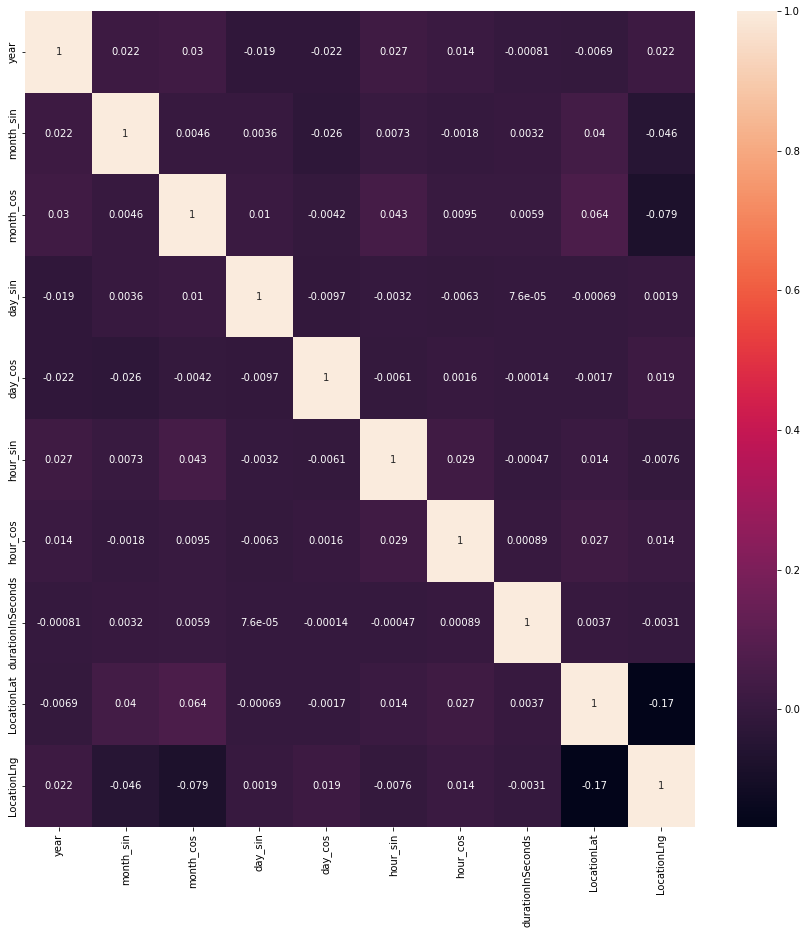

In [53]:
plt.figure(figsize = [15,15])
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [54]:
df_copy.head()

,landing_safety,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,durationInSeconds,LocationLat,LocationLng
0,green,2016,0.5,0.866025,0.937752,0.347305,-0.866025,-5.000000e-01,4800.0,38.0972,-106.1689
1,green,2016,0.5,0.866025,0.937752,0.347305,-0.707107,7.071068e-01,2400.0,38.0972,-106.1689
2,green,2016,0.5,0.866025,0.937752,0.347305,-0.500000,8.660254e-01,34800.0,38.0972,-106.1689
3,green,2016,0.5,0.866025,0.988468,0.151428,-0.500000,8.660254e-01,1200.0,38.0972,-106.1689
4,green,2016,0.5,0.866025,0.998717,-0.050649,1.000000,6.123234e-17,7200.0,38.0972,-106.1689


### Testiranje zavisnosti kolona koriscenjem H0 i H1 hipoteza.


#### Za numericke promenljive koristimo Kruskal-Wallis test

In [55]:
import scipy.stats as stats
alpha = 0.05

In [56]:
df_numeric = df_copy.copy()

In [57]:
cleanup_nums = {"landing_safety": {"green": 1, "yellow": 2, "red": 3}}

In [58]:
df_numeric = df_numeric.replace(cleanup_nums)

In [59]:
df_numeric.head(10)

,landing_safety,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,durationInSeconds,LocationLat,LocationLng
0,1,2016,0.5,0.866025,0.937752,0.347305,-0.866025,-5.000000e-01,4800.0,38.0972,-106.1689
1,1,2016,0.5,0.866025,0.937752,0.347305,-0.707107,7.071068e-01,2400.0,38.0972,-106.1689
2,1,2016,0.5,0.866025,0.937752,0.347305,-0.500000,8.660254e-01,34800.0,38.0972,-106.1689
3,1,2016,0.5,0.866025,0.988468,0.151428,-0.500000,8.660254e-01,1200.0,38.0972,-106.1689
4,1,2016,0.5,0.866025,0.998717,-0.050649,1.000000,6.123234e-17,7200.0,38.0972,-106.1689
5,1,2016,0.5,0.866025,0.998717,-0.050649,0.707107,-7.071068e-01,4800.0,38.0972,-106.1689
6,3,2016,0.5,0.866025,0.968077,-0.250653,0.965926,2.588190e-01,9600.0,38.0972,-106.1689
7,1,2016,0.5,0.866025,0.968077,-0.250653,0.866025,-5.000000e-01,2400.0,38.0972,-106.1689
8,3,2016,0.5,0.866025,0.968077,-0.250653,0.707107,-7.071068e-01,1200.0,38.0972,-106.1689
9,1,2016,0.5,0.866025,0.968077,-0.250653,0.707107,-7.071068e-01,1200.0,38.0972,-106.1689


In [60]:
stat, p = stats.kruskal(df_numeric['landing_safety'], df_numeric['month_sin'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=8647808.704, p=0.000


In [61]:
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


In [62]:
stat, p = stats.kruskal(df_numeric['landing_safety'], df_numeric['day_sin'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=9642415.244, p=0.000


In [63]:
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


In [64]:
stat, p = stats.kruskal(df_numeric['landing_safety'], df_numeric['hour_sin'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=9061197.652, p=0.000


In [65]:
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


In [66]:
stat, p = stats.kruskal(df_numeric['landing_safety'], df_numeric['durationInSeconds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=9652032.147, p=0.000


In [67]:
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


In [68]:
stat, p = stats.kruskal(df_numeric['landing_safety'], df_numeric['LocationLat'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=9641072.910, p=0.000


In [69]:
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


In [70]:
stat, p = stats.kruskal(df_numeric['landing_safety'], df_numeric['LocationLng'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=9641072.900, p=0.000


In [71]:
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)
